<a href="https://colab.research.google.com/github/rohithsai1904/NDP/blob/main/monthsWiseFloods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
data = pd.read_csv('https://raw.githubusercontent.com/amandp13/Flood-Prediction-Model/master/kerala.csv')
print(data)

    SUBDIVISION  YEAR   JAN   FEB  ...    NOV    DEC   ANNUAL RAINFALL  FLOODS
0        KERALA  1901  28.7  44.7  ...  350.8   48.4            3248.6     YES
1        KERALA  1902   6.7   2.6  ...  158.3  121.5            3326.6     YES
2        KERALA  1903   3.2  18.6  ...  157.0   59.0            3271.2     YES
3        KERALA  1904  23.7   3.0  ...   33.9    3.3            3129.7     YES
4        KERALA  1905   1.2  22.3  ...   74.4    0.2            2741.6      NO
..          ...   ...   ...   ...  ...    ...    ...               ...     ...
113      KERALA  2014   4.6  10.3  ...   99.5   47.2            3046.4     YES
114      KERALA  2015   3.1   5.8  ...  223.6   79.4            2600.6      NO
115      KERALA  2016   2.4   3.8  ...  125.4   23.6            2176.6      NO
116     KERALA   2017   1.9   6.8  ...   92.5   38.1            2117.1      NO
117      KERALA  2018  29.1  52.1  ...  125.4   65.1            4473.0     YES

[118 rows x 16 columns]


In [ ]:
data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [ ]:
jan=data.loc[:,['YEAR','JAN']]
jan 

,YEAR,JAN
0,1901,28.7
1,1902,6.7
2,1903,3.2
3,1904,23.7
4,1905,1.2
...,...,...
113,2014,4.6
114,2015,3.1
115,2016,2.4
116,2017,1.9


In [ ]:
jan['res'] = 0
jan

,YEAR,JAN,res
0,1901,28.7,0
1,1902,6.7,0
2,1903,3.2,0
3,1904,23.7,0
4,1905,1.2,0
...,...,...,...
113,2014,4.6,0
114,2015,3.1,0
115,2016,2.4,0
116,2017,1.9,0


In [ ]:
for i in range(len(jan)):
  if jan['JAN'][i] > 263:
    jan['res'] = 1
jan 

,YEAR,JAN,res
0,1901,28.7,0
1,1902,6.7,0
2,1903,3.2,0
3,1904,23.7,0
4,1905,1.2,0
...,...,...,...
113,2014,4.6,0
114,2015,3.1,0
115,2016,2.4,0
116,2017,1.9,0


In [ ]:
x=jan.iloc[:,0:2]
x.head()

,YEAR,JAN
0,1901,28.7
1,1902,6.7
2,1903,3.2
3,1904,23.7
4,1905,1.2


In [ ]:
y = jan.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: res, dtype: int64

In [ ]:
y = np.asarray(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
x = minmax.fit(x).transform(x)
x

array([[0.        , 0.34371257],
       [0.00854701, 0.08023952],
       [0.01709402, 0.03832335],
       [0.02564103, 0.28383234],
       [0.03418803, 0.01437126],
       [0.04273504, 0.31976048],
       [0.05128205, 0.2251497 ],
       [0.05982906, 0.09580838],
       [0.06837607, 0.64790419],
       [0.07692308, 0.03233533],
       [0.08547009, 0.03592814],
       [0.09401709, 0.02275449],
       [0.1025641 , 0.03712575],
       [0.11111111, 0.00838323],
       [0.11965812, 0.20239521],
       [0.12820513, 0.        ],
       [0.13675214, 0.03473054],
       [0.14529915, 0.51377246],
       [0.15384615, 0.51497006],
       [0.16239316, 0.42155689],
       [0.17094017, 0.51497006],
       [0.17948718, 0.36526946],
       [0.18803419, 0.29580838],
       [0.1965812 , 0.23113772],
       [0.20512821, 0.0491018 ],
       [0.21367521, 0.34251497],
       [0.22222222, 0.2251497 ],
       [0.23076923, 0.15209581],
       [0.23931624, 0.15329341],
       [0.24786325, 0.12934132],
       [0.

In [ ]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
y_train[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
clf1 = neighbors.KNeighborsClassifier()
clf1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
clf1.predict(x_test)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
may=data.loc[:,['YEAR','MAY']]
may

,YEAR,MAY
0,1901,174.7
1,1902,134.5
2,1903,249.7
3,1904,235.7
4,1905,263.3
...,...,...
113,2014,251.0
114,2015,201.8
115,2016,186.4
116,2017,173.5


In [ ]:
may['res'] = 0
may

,YEAR,MAY,res
0,1901,174.7,0
1,1902,134.5,0
2,1903,249.7,0
3,1904,235.7,0
4,1905,263.3,0
...,...,...,...
113,2014,251.0,0
114,2015,201.8,0
115,2016,186.4,0
116,2017,173.5,0


In [ ]:
for i in range(len(may)):
  if may['MAY'][i] > 263:
    may['res'][i]=1
may[:20]

,YEAR,MAY,res
0,1901,174.7,0
1,1902,134.5,0
2,1903,249.7,0
3,1904,235.7,0
4,1905,263.3,1
5,1906,160.8,0
6,1907,101.4,0
7,1908,142.6,0
8,1909,473.2,1
9,1910,148.8,0


In [ ]:
x1=may.iloc[:,0:2]
x1

,YEAR,MAY
0,1901,174.7
1,1902,134.5
2,1903,249.7
3,1904,235.7
4,1905,263.3
...,...,...
113,2014,251.0
114,2015,201.8
115,2016,186.4
116,2017,173.5


In [ ]:
y1=may.iloc[:,-1]
y1=np.asarray(y1)
y1

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
x1 = minmax.fit(x1).transform(x1)
x1

array([[0.        , 0.17697695],
       [0.00854701, 0.11832507],
       [0.01709402, 0.2864021 ],
       [0.02564103, 0.26597607],
       [0.03418803, 0.30624453],
       [0.04273504, 0.15669682],
       [0.05128205, 0.0700321 ],
       [0.05982906, 0.13014298],
       [0.06837607, 0.61248906],
       [0.07692308, 0.13918879],
       [0.08547009, 0.18558506],
       [0.09401709, 0.23913043],
       [0.1025641 , 0.2121389 ],
       [0.11111111, 0.16165743],
       [0.11965812, 0.14750511],
       [0.12820513, 0.2124307 ],
       [0.13675214, 0.10140064],
       [0.14529915, 0.91858769],
       [0.15384615, 0.2824628 ],
       [0.16239316, 0.05004377],
       [0.17094017, 0.0739714 ],
       [0.17948718, 0.35045229],
       [0.18803419, 0.03880945],
       [0.1965812 , 0.19258827],
       [0.20512821, 0.29880362],
       [0.21367521, 0.24686315],
       [0.22222222, 0.30930843],
       [0.23076923, 0.04158156],
       [0.23931624, 0.13802159],
       [0.24786325, 0.51283922],
       [0.

In [ ]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
xMay_train,xMay_test,yMay_train,yMay_test=train_test_split(x1,y1,test_size=0.2)
xMay_train[:20]

array([[0.41880342, 0.27516779],
       [0.94017094, 0.10329734],
       [0.1965812 , 0.19258827],
       [0.76068376, 0.63481179],
       [0.68376068, 0.16472133],
       [0.20512821, 0.29880362],
       [0.8034188 , 0.44091042],
       [0.26495726, 0.86533411],
       [0.39316239, 0.04712577],
       [0.54700855, 0.23504523],
       [0.09401709, 0.23913043],
       [0.79487179, 0.12824628],
       [0.18803419, 0.03880945],
       [0.96581197, 0.2882988 ],
       [0.69230769, 0.13831339],
       [0.75213675, 0.16924424],
       [0.42735043, 0.13875109],
       [0.67521368, 0.07572221],
       [0.57264957, 0.05339947],
       [0.15384615, 0.2824628 ]])

In [ ]:
yMay_train

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1])

In [ ]:
clf5=neighbors.KNeighborsClassifier()
clf5.fit(xMay_train,yMay_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
yMay_predict = clf5.predict(xMay_test)
yMay_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0])

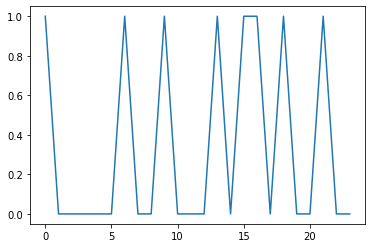

In [ ]:
import matplotlib.pyplot as plt
plt.plot(yMay_test)



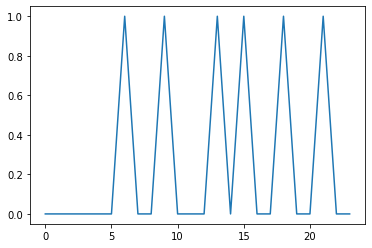

In [ ]:
plt.plot(yMay_predict)

In [ ]:
feb=data.iloc[:,[1,3]]
feb

,YEAR,FEB
0,1901,44.7
1,1902,2.6
2,1903,18.6
3,1904,3.0
4,1905,22.3
...,...,...
113,2014,10.3
114,2015,5.8
115,2016,3.8
116,2017,6.8


In [ ]:
feb['res']=0
feb
for i in range(len(feb)):
  if feb['FEB'][i]>263:
    feb['res'][i]=1
feb

,YEAR,FEB,res
0,1901,44.7,0
1,1902,2.6,0
2,1903,18.6,0
3,1904,3.0,0
4,1905,22.3,0
...,...,...,...
113,2014,10.3,0
114,2015,5.8,0
115,2016,3.8,0
116,2017,6.8,0


In [ ]:
x=feb.iloc[:,0:2]
y=feb.iloc[:,-1]
y=np.asarray(y)
print(x,y)

     YEAR   FEB
0    1901  44.7
1    1902   2.6
2    1903  18.6
3    1904   3.0
4    1905  22.3
..    ...   ...
113  2014  10.3
114  2015   5.8
115  2016   3.8
116  2017   6.8
117  2018  52.1

[118 rows x 2 columns] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [ ]:
from sklearn import preprocessing
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split

minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
x = minmax.fit(x).transform(x)
xFeb_train,xFeb_test,yFeb_train,yFeb_test=train_test_split(x,y,test_size=0.2)
print(xFeb_train,yFeb_train,xFeb_test,yFeb_test)

[[0.75213675 0.        ]
 [0.97435897 0.07341772]
 [0.7008547  0.01898734]
 [0.77777778 0.01139241]
 [0.64957265 0.19873418]
 [0.14529915 0.06329114]
 [0.23931624 0.37721519]
 [0.69230769 0.00126582]
 [0.33333333 0.01898734]
 [0.66666667 0.37974684]
 [0.08547009 0.05443038]
 [0.21367521 0.07341772]
 [0.67521368 0.01139241]
 [0.24786325 0.13670886]
 [0.         0.56582278]
 [0.31623932 1.        ]
 [0.11965812 0.29746835]
 [0.79487179 0.34303797]
 [0.87179487 0.6443038 ]
 [0.91452991 0.3835443 ]
 [0.52136752 0.69240506]
 [0.07692308 0.32531646]
 [0.54700855 0.01139241]
 [0.78632479 0.22531646]
 [0.58119658 0.08101266]
 [0.58974359 0.22278481]
 [0.62393162 0.06835443]
 [0.27350427 0.11772152]
 [0.73504274 0.01012658]
 [0.5042735  0.10632911]
 [1.         0.65949367]
 [0.37606838 0.12531646]
 [0.95726496 0.50759494]
 [0.17948718 0.27088608]
 [0.25641026 0.00379747]
 [0.5982906  0.23417722]
 [0.43589744 0.61012658]
 [0.09401709 0.18987342]
 [0.39316239 0.34556962]
 [0.30769231 0.26835443]


In [ ]:
clf2=neighbors.KNeighborsClassifier()
clf2.fit(xFeb_train,yFeb_train)
print("Predicted Values for the Floods:")
yFeb_predict=clf2.predict(xFeb_test)
print(yFeb_predict,len(yFeb_predict))

Predicted Values for the Floods:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 24


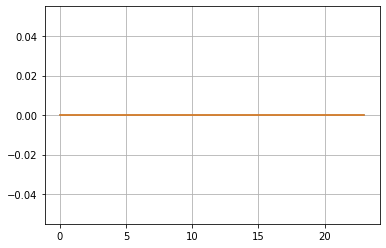

In [ ]:
plt.plot(yFeb_predict)
plt.plot(yFeb_test)
plt.grid("on")
plt.show()

In [ ]:
mar=data.iloc[:,[1,4]]
mar

,YEAR,MAR
0,1901,51.6
1,1902,57.3
2,1903,3.1
3,1904,32.2
4,1905,9.4
...,...,...
113,2014,17.9
114,2015,50.1
115,2016,35.9
116,2017,8.9


In [ ]:
mar['res']=0
for i in range(len(mar)):
  if mar['MAR'][i]>263:
    mar['MAR'][i]=1
mar[:20]

,YEAR,MAR,res
0,1901,51.6,0
1,1902,57.3,0
2,1903,3.1,0
3,1904,32.2,0
4,1905,9.4,0
5,1906,9.9,0
6,1907,55.7,0
7,1908,38.2,0
8,1909,61.3,0
9,1910,23.3,0


In [ ]:
x=mar.iloc[:,0:2]
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
x = minmax.fit(x).transform(x)
x
y=mar.iloc[:,-1]
y=np.asarray(y)
print(x,y)

[[0.         0.23721787]
 [0.00854701 0.26347305]
 [0.01709402 0.01381852]
 [0.02564103 0.14785813]
 [0.03418803 0.0428374 ]
 [0.04273504 0.04514049]
 [0.05128205 0.25610318]
 [0.05982906 0.17549516]
 [0.06837607 0.28189774]
 [0.07692308 0.1068632 ]
 [0.08547009 0.08337172]
 [0.09401709 0.05112851]
 [0.1025641  0.09488715]
 [0.11111111 0.0829111 ]
 [0.11965812 0.19622294]
 [0.12820513 0.10087517]
 [0.13675214 0.36526946]
 [0.14529915 0.15062183]
 [0.15384615 0.15568862]
 [0.16239316 0.11054813]
 [0.17094017 0.06863197]
 [0.17948718 0.07461999]
 [0.18803419 0.36296637]
 [0.1965812  0.30631046]
 [0.20512821 0.35375403]
 [0.21367521 0.10594196]
 [0.22222222 0.22800553]
 [0.23076923 0.23583602]
 [0.23931624 0.27084293]
 [0.24786325 0.1791801 ]
 [0.25641026 0.08797789]
 [0.26495726 0.13127591]
 [0.27350427 0.16950714]
 [0.28205128 0.2192538 ]
 [0.29059829 0.0829111 ]
 [0.2991453  0.53385537]
 [0.30769231 0.2699217 ]
 [0.31623932 0.24504836]
 [0.32478632 0.11423307]
 [0.33333333 0.01704284]


In [ ]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
xMar_train,xMar_test,yMar_train,yMar_test=train_test_split(x,y,test_size=0.2)
print(xMar_train[:20],yMar_train[:20],xMar_test,yMar_test)

[[0.99145299 0.04053432]
 [0.55555556 0.31137725]
 [0.98290598 0.16490097]
 [0.35042735 0.10640258]
 [0.05982906 0.17549516]
 [0.7008547  0.00368494]
 [0.00854701 0.26347305]
 [0.27350427 0.16950714]
 [0.47008547 0.06909258]
 [0.74358974 0.17503455]
 [0.08547009 0.08337172]
 [0.12820513 0.10087517]
 [0.52991453 0.32105021]
 [0.04273504 0.04514049]
 [0.29059829 0.0829111 ]
 [0.70940171 0.4385076 ]
 [0.47863248 0.11791801]
 [0.11965812 0.19622294]
 [0.94017094 0.11054813]
 [0.17948718 0.07461999]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [[0.65811966 0.14417319]
 [0.48717949 0.26347305]
 [0.58974359 0.11837863]
 [0.37606838 0.05803777]
 [0.75213675 0.13818517]
 [0.1025641  0.09488715]
 [0.32478632 0.11423307]
 [0.52136752 0.1819438 ]
 [0.39316239 0.45094427]
 [0.54700855 0.12989406]
 [0.90598291 0.03316444]
 [0.71794872 0.13450023]
 [0.38461538 0.49884846]
 [0.63247863 0.2915707 ]
 [0.25641026 0.08797789]
 [0.79487179 0.0829111 ]
 [0.93162393 0.14417319]
 [0.88888889 0.11607554]
 [0.205

In [ ]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
clf3=neighbors.KNeighborsClassifier()
clf3.fit(xMar_train,yMar_train)
print("Predicted Values for the Floods:")
yMar_predict=clf3.predict(xMar_test)
print(yMar_predict,len(yMar_predict))

Predicted Values for the Floods:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 24


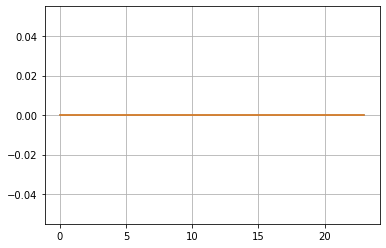

In [ ]:
from matplotlib import pyplot as plt
plt.plot(yMar_predict)
plt.plot(yMar_test)
plt.grid("on")
plt.show()

In [ ]:
apr=data.iloc[:,[1,5]]
apr['res']=0
for i in range(len(apr)):
  if apr['APR'][i]>263:
    apr['res'][i]=1
apr

,YEAR,APR,res
0,1901,160.0,0
1,1902,83.9,0
2,1903,83.6,0
3,1904,71.5,0
4,1905,105.9,0
...,...,...,...
113,2014,95.7,0
114,2015,214.1,0
115,2016,143.0,0
116,2017,43.6,0


In [ ]:
x=apr.iloc[:,0:2]
y=apr.iloc[:,-1]
y=np.asarray(y)
print(x,y)

     YEAR    APR
0    1901  160.0
1    1902   83.9
2    1903   83.6
3    1904   71.5
4    1905  105.9
..    ...    ...
113  2014   95.7
114  2015  214.1
115  2016  143.0
116  2017   43.6
117  2018  116.4

[118 rows x 2 columns] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [ ]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
x = minmax.fit(x).transform(x)
x

array([[0.        , 0.65317919],
       [0.00854701, 0.31480658],
       [0.01709402, 0.31347265],
       [0.02564103, 0.25967096],
       [0.03418803, 0.41262783],
       [0.04273504, 0.20586928],
       [0.05128205, 0.70120053],
       [0.05982906, 0.39928857],
       [0.06837607, 0.35882614],
       [0.07692308, 0.49533126],
       [0.08547009, 0.16851934],
       [0.09401709, 0.4873277 ],
       [0.1025641 , 0.27834593],
       [0.11111111, 0.08714984],
       [0.11965812, 0.41307248],
       [0.12820513, 0.30813695],
       [0.13675214, 0.11116052],
       [0.14529915, 0.16985327],
       [0.15384615, 0.23477101],
       [0.16239316, 0.70653624],
       [0.17094017, 0.70342374],
       [0.17948718, 0.34015118],
       [0.18803419, 0.13517119],
       [0.1965812 , 0.43530458],
       [0.20512821, 0.35704758],
       [0.21367521, 0.18986216],
       [0.22222222, 0.32636727],
       [0.23076923, 0.48021343],
       [0.23931624, 0.87861272],
       [0.24786325, 0.39839929],
       [0.

In [ ]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
xApr_train,xApr_test,yApr_train,yApr_test=train_test_split(x,y,test_size=0.2)
xApr_train[:20]

array([[0.64102564, 0.53979546],
       [0.77777778, 0.13294798],
       [0.34188034, 0.39484215],
       [0.62393162, 0.51089373],
       [0.66666667, 0.12850156],
       [0.20512821, 0.35704758],
       [0.05128205, 0.70120053],
       [0.35897436, 0.41974211],
       [0.55555556, 0.6860827 ],
       [0.41880342, 0.2463317 ],
       [0.35042735, 0.74344153],
       [0.53846154, 0.31213873],
       [0.5042735 , 0.86038239],
       [0.58119658, 0.46287239],
       [1.        , 0.45931525],
       [0.57264957, 0.53445976],
       [0.4017094 , 0.49755447],
       [0.52991453, 0.3699422 ],
       [0.1025641 , 0.27834593],
       [0.97435897, 0.89373055]])

In [ ]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
clf4=neighbors.KNeighborsClassifier()
clf4.fit(xApr_train,yApr_train)
print("Predicted Values for the Floods:")
yApr_predict=clf4.predict(xApr_test)
print(yApr_predict,len(yApr_predict))

Predicted Values for the Floods:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 24


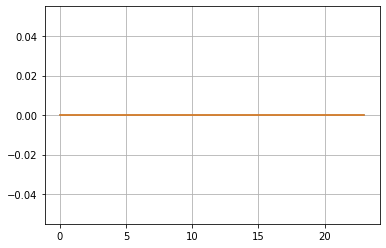

In [ ]:
plt.plot(yApr_predict)
plt.plot(yApr_test)
plt.grid("on")
plt.show()

In [ ]:
jun=data.iloc[:,[1,7]]
jun['res']=0
for i in range(len(jun)):
  if jun['JUN'][i]>263:
    jun['res'][i]=1
jun[:20]

,YEAR,JUN,res
0,1901,824.6,1
1,1902,390.9,1
2,1903,558.6,1
3,1904,1098.2,1
4,1905,850.2,1
5,1906,414.9,1
6,1907,770.9,1
7,1908,592.6,1
8,1909,704.7,1
9,1910,680.0,1


In [ ]:
x=jun.iloc[:,0:2]
y=jun.iloc[:,-1]
y=np.asarray(y)
print(x,y)

     YEAR     JUN
0    1901   824.6
1    1902   390.9
2    1903   558.6
3    1904  1098.2
4    1905   850.2
..    ...     ...
113  2014   454.4
114  2015   563.6
115  2016   522.2
116  2017   498.5
117  2018   625.4

[118 rows x 2 columns] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]


In [ ]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
x = minmax.fit(x).transform(x)
x

array([[0.        , 0.69647215],
       [0.00854701, 0.21533171],
       [0.01709402, 0.40137564],
       [0.02564103, 1.        ],
       [0.03418803, 0.72487242],
       [0.04273504, 0.24195696],
       [0.05128205, 0.63689816],
       [0.05982906, 0.43909474],
       [0.06837607, 0.56345684],
       [0.07692308, 0.53605503],
       [0.08547009, 0.8799645 ],
       [0.09401709, 0.83359219],
       [0.1025641 , 0.38262702],
       [0.11111111, 0.40880852],
       [0.11965812, 0.55391613],
       [0.12820513, 0.8025294 ],
       [0.13675214, 0.56234746],
       [0.14529915, 0.29676059],
       [0.15384615, 0.48812958],
       [0.16239316, 0.85145329],
       [0.17094017, 0.32427335],
       [0.17948718, 0.51730641],
       [0.18803419, 0.58320391],
       [0.1965812 , 0.90403816],
       [0.20512821, 0.54581762],
       [0.21367521, 0.40725538],
       [0.22222222, 0.58065232],
       [0.23076923, 0.43698691],
       [0.23931624, 0.83181717],
       [0.24786325, 0.48402485],
       [0.

In [ ]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
xJun_train,xJun_test,yJun_train,yJun_test=train_test_split(x,y,test_size=0.2)
xJun_train[:20]

array([[0.07692308, 0.53605503],
       [0.57264957, 0.55424895],
       [0.69230769, 0.4608387 ],
       [0.30769231, 0.3203905 ],
       [0.77777778, 0.69059241],
       [0.48717949, 0.57299756],
       [0.95726496, 0.93842911],
       [0.13675214, 0.56234746],
       [0.47863248, 0.74905702],
       [0.52136752, 0.05336144],
       [0.98290598, 0.36099401],
       [0.51282051, 0.89682716],
       [0.09401709, 0.83359219],
       [0.47008547, 0.61970268],
       [0.17094017, 0.32427335],
       [0.90598291, 0.56478811],
       [0.94017094, 0.65642334],
       [0.36752137, 0.33514533],
       [0.83760684, 0.45540271],
       [0.05128205, 0.63689816]])

In [ ]:
clf6=neighbors.KNeighborsClassifier()
clf6.fit(xJun_train,yJun_train)
print("Predicted Values for the Floods:")
yJun_predict=clf6.predict(xJun_test)
print(yJun_predict,len(yJun_predict))

Predicted Values for the Floods:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 24


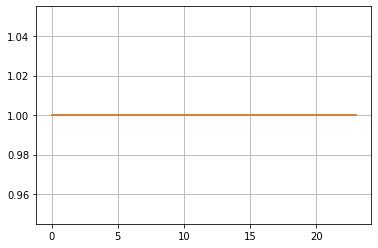

In [ ]:
plt.plot(yJun_predict)
plt.plot(yJun_test)
plt.grid("on")
plt.show()

In [ ]:
jul=data.iloc[:,[1,8]]
jul['res']=0
for i in range(len(jul)):
  if jul['JUL'][i]>263:
    jul['res'][i]=1
jul

,YEAR,JUL,res
0,1901,743.0,1
1,1902,1205.0,1
2,1903,1022.5,1
3,1904,725.5,1
4,1905,520.5,1
...,...,...,...
113,2014,677.8,1
114,2015,406.0,1
115,2016,412.3,1
116,2017,319.6,1


In [ ]:
x=jul.iloc[:,0:2]
y=jul.iloc[:,-1]
y=np.asarray(y)
print(x,y)

     YEAR     JUL
0    1901   743.0
1    1902  1205.0
2    1903  1022.5
3    1904   725.5
4    1905   520.5
..    ...     ...
113  2014   677.8
114  2015   406.0
115  2016   412.3
116  2017   319.6
117  2018  1048.5

[118 rows x 2 columns] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]


In [ ]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
x = minmax.fit(x).transform(x)
x

array([[0.        , 0.42347314],
       [0.00854701, 0.76342899],
       [0.01709402, 0.62913907],
       [0.02564103, 0.41059603],
       [0.03418803, 0.25974982],
       [0.04273504, 0.57888153],
       [0.05128205, 0.43627667],
       [0.05982906, 0.5406181 ],
       [0.06837607, 0.45239146],
       [0.07692308, 0.23296542],
       [0.08547009, 0.39573216],
       [0.09401709, 0.49013981],
       [0.1025641 , 0.43833701],
       [0.11111111, 0.50787344],
       [0.11965812, 0.44746137],
       [0.12820513, 0.2548933 ],
       [0.13675214, 0.12891832],
       [0.14529915, 0.        ],
       [0.15384615, 0.3535688 ],
       [0.16239316, 0.56902134],
       [0.17094017, 0.34753495],
       [0.17948718, 0.63105224],
       [0.18803419, 0.61898455],
       [0.1965812 , 1.        ],
       [0.20512821, 0.31346578],
       [0.21367521, 0.5281089 ],
       [0.22222222, 0.53031641],
       [0.23076923, 0.18623988],
       [0.23931624, 0.49779249],
       [0.24786325, 0.1723326 ],
       [0.

In [ ]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
xJul_train,xJul_test,yJul_train,yJul_test=train_test_split(x,y,test_size=0.2)
xJul_train[:20]

array([[0.71794872, 0.16291391],
       [0.46153846, 0.16578366],
       [0.76923077, 0.54304636],
       [0.15384615, 0.3535688 ],
       [0.31623932, 0.3540103 ],
       [0.86324786, 0.11125828],
       [0.63247863, 0.26769684],
       [0.01709402, 0.62913907],
       [0.55555556, 0.3196468 ],
       [0.1965812 , 1.        ],
       [0.06837607, 0.45239146],
       [0.92307692, 0.55732156],
       [1.        , 0.64827079],
       [0.45299145, 0.34805004],
       [0.47008547, 0.22023547],
       [0.44444444, 0.63289183],
       [0.85470085, 0.31714496],
       [0.84615385, 0.12928624],
       [0.39316239, 0.36924209],
       [0.29059829, 0.38248712]])

In [ ]:
clf7=neighbors.KNeighborsClassifier()
clf7.fit(xJul_train,yJul_train)
print("Predicted Values for the Floods:")
yJul_predict=clf7.predict(xJul_test)
print(yJul_predict,len(yJul_predict))

Predicted Values for the Floods:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 24


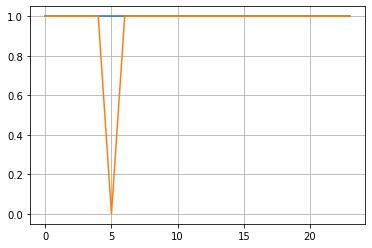

In [ ]:
plt.plot(yJul_predict)
plt.plot(yJul_test)
plt.grid("on")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print("\nAccuracy Score:%f"%(accuracy_score(yJul_test,yJul_predict)*100))


Accuracy Score:95.833333


In [ ]:
aug=data.iloc[:,[1,9]]
aug['res']=0
for i in range(len(aug)):
  if aug['AUG'][i]>263:
    aug['res'][i]=1
aug

,YEAR,AUG,res
0,1901,357.5,1
1,1902,315.8,1
2,1903,420.2,1
3,1904,351.8,1
4,1905,293.6,1
...,...,...,...
113,2014,733.9,1
114,2015,252.2,0
115,2016,325.5,1
116,2017,531.8,1


In [ ]:
x=aug.iloc[:,0:2]
y=aug.iloc[:,-1]
y=np.asarray(y)
print(x,y)

     YEAR     AUG
0    1901   357.5
1    1902   315.8
2    1903   420.2
3    1904   351.8
4    1905   293.6
..    ...     ...
113  2014   733.9
114  2015   252.2
115  2016   325.5
116  2017   531.8
117  2018  1398.9

[118 rows x 2 columns] [1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1]


In [ ]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
x = minmax.fit(x).transform(x)
x

array([[0.        , 0.14660329],
       [0.00854701, 0.11243137],
       [0.01709402, 0.1979841 ],
       [0.02564103, 0.14193231],
       [0.03418803, 0.09423912],
       [0.04273504, 0.21650414],
       [0.05128205, 0.65795296],
       [0.05982906, 0.14283373],
       [0.06837607, 0.06506597],
       [0.07692308, 0.24190773],
       [0.08547009, 0.        ],
       [0.09401709, 0.29156765],
       [0.1025641 , 0.05621568],
       [0.11111111, 0.18323363],
       [0.11965812, 0.09850037],
       [0.12820513, 0.17889044],
       [0.13675214, 0.12824715],
       [0.14529915, 0.1617635 ],
       [0.15384615, 0.25043022],
       [0.16239316, 0.04621814],
       [0.17094017, 0.37966074],
       [0.17948718, 0.11636483],
       [0.18803419, 0.62640334],
       [0.1965812 , 0.36499222],
       [0.20512821, 0.30771122],
       [0.21367521, 0.2928788 ],
       [0.22222222, 0.11177579],
       [0.23076923, 0.30697369],
       [0.23931624, 0.09448496],
       [0.24786325, 0.07768581],
       [0.

In [ ]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
xAug_train,xAug_test,yAug_train,yAug_test=train_test_split(x,y,test_size=0.2)
xAug_train[:20]

array([[0.79487179, 0.2469065 ],
       [0.33333333, 0.3541752 ],
       [0.71794872, 0.11202163],
       [0.67521368, 0.21265263],
       [0.4017094 , 0.25346226],
       [0.09401709, 0.29156765],
       [0.97435897, 0.06031304],
       [0.85470085, 0.14971728],
       [0.64957265, 0.04556257],
       [0.42735043, 0.00983365],
       [0.31623932, 0.08956814],
       [0.7008547 , 0.32885356],
       [0.21367521, 0.2928788 ],
       [0.04273504, 0.21650414],
       [0.37606838, 0.14193231],
       [0.36752137, 0.04269442],
       [0.66666667, 0.16807342],
       [0.15384615, 0.25043022],
       [0.68376068, 0.25977219],
       [0.76923077, 0.23510612]])

In [ ]:
clf8=neighbors.KNeighborsClassifier()
clf8.fit(xAug_train,yAug_train)
print("Predicted Values for the Floods:")
yAug_predict=clf8.predict(xAug_test)
print(yAug_predict,len(yAug_predict))

Predicted Values for the Floods:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1] 24


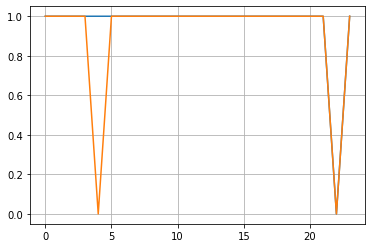

In [ ]:
plt.plot(yAug_predict)
plt.plot(yAug_test)
plt.grid("on")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print("\nAccuracy Score:%f"%(accuracy_score(yAug_test,yAug_predict)*100))


Accuracy Score:95.833333


In [ ]:
sep=data.iloc[:,[1,10]]
sep['res']=0
for i in range(len(sep)):
  if sep['SEP'][i]>263:
    sep['res'][i]=1
sep

,YEAR,SEP,res
0,1901,197.7,0
1,1902,491.6,1
2,1903,341.8,1
3,1904,222.7,0
4,1905,217.2,0
...,...,...,...
113,2014,298.8,1
114,2015,292.9,1
115,2016,173.2,0
116,2017,209.5,0


In [ ]:
x=sep.iloc[:,0:2]
y=sep.iloc[:,-1]
y=np.asarray(y)
print(x,y)

     YEAR    SEP
0    1901  197.7
1    1902  491.6
2    1903  341.8
3    1904  222.7
4    1905  217.2
..    ...    ...
113  2014  298.8
114  2015  292.9
115  2016  173.2
116  2017  209.5
117  2018  423.6

[118 rows x 2 columns] [0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1
 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 1 0 0 1]


In [ ]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
x = minmax.fit(x).transform(x)
x

array([[0.        , 0.32220849],
       [0.00854701, 0.9276885 ],
       [0.01709402, 0.61907705],
       [0.02564103, 0.3737124 ],
       [0.03418803, 0.36238154],
       [0.04273504, 0.18520808],
       [0.05128205, 0.37845076],
       [0.05982906, 0.27729707],
       [0.06837607, 0.31747013],
       [0.07692308, 0.42707046],
       [0.08547009, 0.03893696],
       [0.09401709, 0.19674495],
       [0.1025641 , 0.27935723],
       [0.11111111, 0.41141327],
       [0.11965812, 0.73197363],
       [0.12820513, 0.61392666],
       [0.13675214, 0.88380717],
       [0.14529915, 0.11351463],
       [0.15384615, 0.4421096 ],
       [0.16239316, 0.2816234 ],
       [0.17094017, 0.23774207],
       [0.17948718, 0.37309436],
       [0.18803419, 0.43881335],
       [0.1965812 , 0.5105068 ],
       [0.20512821, 0.2420684 ],
       [0.21367521, 0.57972806],
       [0.22222222, 0.60630408],
       [0.23076923, 0.07128142],
       [0.23931624, 0.46889164],
       [0.24786325, 0.76266996],
       [0.

In [ ]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
xSep_train,xSep_test,ySep_train,ySep_test=train_test_split(x,y,test_size=0.2)
xSep_train[:20]

array([[0.83760684, 0.09620931],
       [0.47008547, 0.28244747],
       [0.88888889, 0.76926246],
       [0.57264957, 0.58529048],
       [0.67521368, 0.20230738],
       [0.33333333, 0.05541821],
       [0.85470085, 0.36155748],
       [0.2991453 , 0.50556242],
       [0.96581197, 0.53049032],
       [0.52136752, 0.72847136],
       [0.15384615, 0.4421096 ],
       [0.21367521, 0.57972806],
       [0.63247863, 0.8578492 ],
       [0.73504274, 0.23836012],
       [0.38461538, 0.32571075],
       [0.42735043, 0.56139267],
       [0.35042735, 0.12051916],
       [0.45299145, 0.3302431 ],
       [0.25641026, 0.25113309],
       [0.14529915, 0.11351463]])

In [ ]:
clf9=neighbors.KNeighborsClassifier()
clf9.fit(xSep_train,ySep_train)
print("Predicted Values for the Floods:")
ySep_predict=clf9.predict(xSep_test)
print(ySep_predict,len(ySep_predict))

Predicted Values for the Floods:
[0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1] 24


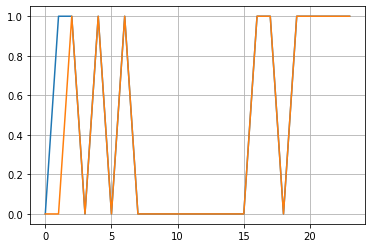

In [ ]:
plt.plot(ySep_predict)
plt.plot(ySep_test)
plt.grid("on")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print("\nAccuracy Score:%f"%(accuracy_score(ySep_test,ySep_predict)*100))


Accuracy Score:95.833333


In [ ]:
oct=data.iloc[:,[1,11]]
oct['res']=0
for i in range(len(oct)):
  if oct['OCT'][i]>263:
    oct['res'][i]=1
oct

,YEAR,OCT,res
0,1901,266.9,1
1,1902,358.4,1
2,1903,354.1,1
3,1904,328.1,1
4,1905,383.5,1
...,...,...,...
113,2014,355.5,1
114,2015,308.1,1
115,2016,225.9,0
116,2017,192.4,0


In [ ]:
x=oct.iloc[:,0:2]
y=oct.iloc[:,-1]
y=np.asarray(y)
print(x,y)

     YEAR    OCT
0    1901  266.9
1    1902  358.4
2    1903  354.1
3    1904  328.1
4    1905  383.5
..    ...    ...
113  2014  355.5
114  2015  308.1
115  2016  225.9
116  2017  192.4
117  2018  356.1

[118 rows x 2 columns] [1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1
 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0
 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0
 0 0 1 1 0 0 1]


In [ ]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
x = minmax.fit(x).transform(x)
x

array([[0.        , 0.39727673],
       [0.00854701, 0.5804966 ],
       [0.01709402, 0.57188626],
       [0.02564103, 0.51982379],
       [0.03418803, 0.63075691],
       [0.04273504, 0.36684021],
       [0.05128205, 0.48297958],
       [0.05982906, 0.37004405],
       [0.06837607, 0.28754505],
       [0.07692308, 0.57689227],
       [0.08547009, 0.46816179],
       [0.09401709, 0.80296356],
       [0.1025641 , 0.70885062],
       [0.11111111, 0.61253504],
       [0.11965812, 0.25650781],
       [0.12820513, 0.50500601],
       [0.13675214, 0.39167   ],
       [0.14529915, 0.32979575],
       [0.15384615, 0.3618342 ],
       [0.16239316, 0.56387665],
       [0.17094017, 0.46836203],
       [0.17948718, 0.39607529],
       [0.18803419, 0.26952343],
       [0.1965812 , 0.21625951],
       [0.20512821, 0.45434521],
       [0.21367521, 0.29675611],
       [0.22222222, 0.13476171],
       [0.23076923, 0.50660793],
       [0.23931624, 0.56447737],
       [0.24786325, 0.73167801],
       [0.

In [ ]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
xOct_train,xOct_test,yOct_train,yOct_test=train_test_split(x,y,test_size=0.2)
xOct_train[:20]

array([[0.55555556, 0.64837805],
       [0.17948718, 0.39607529],
       [0.74358974, 0.        ],
       [0.64102564, 0.30596716],
       [0.94871795, 0.23828594],
       [0.93162393, 0.74669604],
       [0.75213675, 0.47957549],
       [0.30769231, 0.66760112],
       [0.52136752, 0.81517821],
       [0.29059829, 0.67140569],
       [0.79487179, 0.7206648 ],
       [0.11965812, 0.25650781],
       [0.21367521, 0.29675611],
       [0.95726496, 0.38325991],
       [0.46153846, 0.62014417],
       [0.82051282, 0.4413296 ],
       [0.62393162, 0.14737685],
       [0.        , 0.39727673],
       [0.05128205, 0.48297958],
       [0.45299145, 0.46976372]])

In [ ]:
clf10=neighbors.KNeighborsClassifier()
clf10.fit(xOct_train,yOct_train)
print("Predicted Values for the Floods:")
yOct_predict=clf10.predict(xOct_test)
print(yOct_predict,len(yOct_predict))

Predicted Values for the Floods:
[1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1] 24


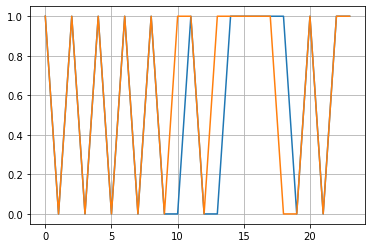

In [ ]:
plt.plot(yOct_predict)
plt.plot(yOct_test)
plt.grid("on")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print("\nAccuracy Score:%f"%(accuracy_score(yOct_test,yOct_predict)*100))


Accuracy Score:87.500000


In [ ]:
nov=data.iloc[:,[1,12]]
nov['res']=0
for i in range(len(nov)):
  if nov['NOV'][i]>263:
    nov['res'][i]=1
nov

,YEAR,NOV,res
0,1901,350.8,1
1,1902,158.3,0
2,1903,157.0,0
3,1904,33.9,0
4,1905,74.4,0
...,...,...,...
113,2014,99.5,0
114,2015,223.6,0
115,2016,125.4,0
116,2017,92.5,0


In [ ]:
x=nov.iloc[:,0:2]
y=nov.iloc[:,-1]
y=np.asarray(y)
print(x,y)

     YEAR    NOV
0    1901  350.8
1    1902  158.3
2    1903  157.0
3    1904   33.9
4    1905   74.4
..    ...    ...
113  2014   99.5
114  2015  223.6
115  2016  125.4
116  2017   92.5
117  2018  125.4

[118 rows x 2 columns] [1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0]


In [ ]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
x = minmax.fit(x).transform(x)
x

array([[0.00000000e+00, 9.55701886e-01],
       [8.54700855e-03, 3.79527088e-01],
       [1.70940171e-02, 3.75636037e-01],
       [2.56410256e-02, 7.18347800e-03],
       [3.41880342e-02, 1.28404669e-01],
       [4.27350427e-02, 3.93894044e-01],
       [5.12820513e-02, 5.61508530e-01],
       [5.98290598e-02, 4.90870997e-02],
       [6.83760684e-02, 4.17838970e-01],
       [7.69230769e-02, 7.44986531e-01],
       [8.54700855e-02, 3.41813828e-01],
       [9.40170940e-02, 3.20862017e-01],
       [1.02564103e-01, 2.34660281e-01],
       [1.11111111e-01, 2.07722239e-01],
       [1.19658120e-01, 8.11134391e-01],
       [1.28205128e-01, 3.07692308e-01],
       [1.36752137e-01, 6.73151751e-01],
       [1.45299145e-01, 7.89883268e-01],
       [1.53846154e-01, 7.44088596e-01],
       [1.62393162e-01, 8.10535768e-01],
       [1.70940171e-01, 3.13379228e-01],
       [1.79487179e-01, 7.84794972e-01],
       [1.88034188e-01, 1.56839270e-01],
       [1.96581197e-01, 3.93295421e-01],
       [2.051282

In [ ]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
xNov_train,xNov_test,yNov_train,yNov_test=train_test_split(x,y,test_size=0.2)
xNov_train[:20]

array([[0.23076923, 0.37024843],
       [0.66666667, 0.68901526],
       [0.96581197, 0.20353188],
       [0.47008547, 0.43909009],
       [0.83760684, 0.10954804],
       [0.04273504, 0.39389404],
       [0.48717949, 0.52259802],
       [0.69230769, 0.28733912],
       [0.61538462, 0.15863514],
       [0.31623932, 0.1137384 ],
       [0.88034188, 0.26698593],
       [0.18803419, 0.15683927],
       [0.35042735, 0.15923376],
       [0.64102564, 0.76384316],
       [0.56410256, 0.12720742],
       [0.39316239, 0.0026938 ],
       [0.37606838, 0.68243041],
       [0.11965812, 0.81113439],
       [0.58119658, 0.26309488],
       [0.55555556, 0.64022748]])

In [ ]:
clf11=neighbors.KNeighborsClassifier()
clf11.fit(xNov_train,yNov_train)
print("Predicted Values for the Floods:")
yNov_predict=clf11.predict(xNov_test)
print(yNov_predict,len(yNov_predict))

Predicted Values for the Floods:
[0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0] 24


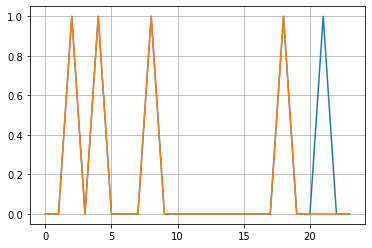

In [ ]:
plt.plot(yNov_predict)
plt.plot(yNov_test)
plt.grid("on")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print("\nAccuracy Score:%f"%(accuracy_score(yNov_test,yNov_predict)*100))


Accuracy Score:95.833333


In [ ]:
dec=data.iloc[:,[1,13]]
dec['res']=0
for i in range(len(dec)):
  if dec['DEC'][i]>263:
    dec['res'][i]=1
dec

,YEAR,DEC,res
0,1901,48.4,0
1,1902,121.5,0
2,1903,59.0,0
3,1904,3.3,0
4,1905,0.2,0
...,...,...,...
113,2014,47.2,0
114,2015,79.4,0
115,2016,23.6,0
116,2017,38.1,0


In [ ]:
x=dec.iloc[:,0:2]
y=dec.iloc[:,-1]
y=np.asarray(y)
print(x,y)

     YEAR    DEC
0    1901   48.4
1    1902  121.5
2    1903   59.0
3    1904    3.3
4    1905    0.2
..    ...    ...
113  2014   47.2
114  2015   79.4
115  2016   23.6
116  2017   38.1
117  2018   65.1

[118 rows x 2 columns] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [ ]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
x = minmax.fit(x).transform(x)
x

array([[0.00000000e+00, 2.38872404e-01],
       [8.54700855e-03, 6.00395648e-01],
       [1.70940171e-02, 2.91295747e-01],
       [2.56410256e-02, 1.58259149e-02],
       [3.41880342e-02, 4.94559842e-04],
       [4.27350427e-02, 4.24826904e-01],
       [5.12820513e-02, 2.60633037e-01],
       [5.98290598e-02, 5.39070227e-02],
       [6.83760684e-02, 1.59248269e-01],
       [7.69230769e-02, 0.00000000e+00],
       [8.54700855e-02, 4.32739862e-01],
       [9.40170940e-02, 1.08308605e-01],
       [1.02564103e-01, 2.26013848e-01],
       [1.11111111e-01, 6.68150346e-01],
       [1.19658120e-01, 7.31948566e-02],
       [1.28205128e-01, 4.35212661e-02],
       [1.36752137e-01, 2.05242334e-01],
       [1.45299145e-01, 2.67062315e-01],
       [1.53846154e-01, 2.61622156e-01],
       [1.62393162e-01, 4.00593472e-02],
       [1.70940171e-01, 7.76458952e-02],
       [1.79487179e-01, 1.23639960e-01],
       [1.88034188e-01, 2.05242334e-01],
       [1.96581197e-01, 2.48763600e-01],
       [2.051282

In [ ]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
xDec_train,xDec_test,yDec_train,yDec_test=train_test_split(x,y,test_size=0.2)
xDec_train[:20]

array([[0.30769231, 0.09396637],
       [0.88888889, 0.27843719],
       [0.37606838, 0.08852621],
       [0.56410256, 0.15331355],
       [0.33333333, 0.29673591],
       [0.06837607, 0.15924827],
       [0.78632479, 0.22799209],
       [0.05982906, 0.05390702],
       [1.        , 0.3214639 ],
       [0.44444444, 0.02472799],
       [0.77777778, 0.01780415],
       [0.75213675, 0.02720079],
       [0.87179487, 0.04747774],
       [0.76923077, 0.01088032],
       [0.17094017, 0.0776459 ],
       [0.01709402, 0.29129575],
       [0.31623932, 0.11275964],
       [0.58119658, 0.32739862],
       [0.43589744, 0.33036597],
       [0.99145299, 0.18793274]])

In [ ]:
clf12=neighbors.KNeighborsClassifier()
clf12.fit(xDec_train,yDec_train)
print("Predicted Values for the Floods:")
yDec_predict=clf12.predict(xDec_test)
print(yDec_predict,len(yDec_predict))

Predicted Values for the Floods:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 24


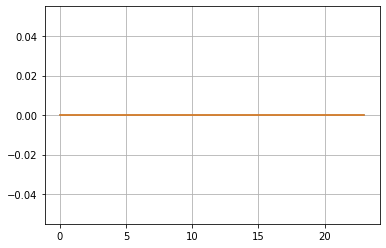

In [ ]:
plt.plot(yDec_predict)
plt.plot(yDec_test)
plt.grid("on")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print("\nAccuracy Score:%f"%(accuracy_score(yDec_test,yDec_predict)*100))


Accuracy Score:100.000000


In [ ]:
ds = [[0.39316239, 0.23194857]]
clf10.predict(ds)

array([0])

In [ ]:
x=[[2001,350]]

minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
x = minmax.fit(x).transform(x)
x


array([[0., 0.]])

In [ ]:
clf10.predict(x)

array([0])

In [ ]:
x = [[0.73504274, 0.03936718],
       [0.64957265, 0.43105224],
       [0.4957265 , 0.72715232],
       [0.35897436, 0.48866814],
       [0.83760684, 0.39212656]]
clf6.predict(x)

array([1, 1, 1, 1, 1])

In [ ]:
x = input("Enter mnth") # for month
y = float(input("Enter rainfall")) 

year = 2020
arr = [[]]
arr[0].append(year)
arr[0].append(y)

arr

Enter mnth3
Enter rainfall30


[[2020, 30.0]]

In [ ]:
d={'jan':clf1,'feb':clf2,'mar':clf3,'apr':clf4,'may':clf5,'jun':clf6,'jul':clf7,'aug':clf8,'sep':clf9,'oct':clf10,'nov':clf11,'dec':clf12}
print(d)


{'jan': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), 'feb': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), 'mar': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), 'apr': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), 'may': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), 'jun': KNeighborsClassif

In [ ]:
import pickle
with open('floodpred.pkl', 'wb') as file:
     pickle.dump(d, file)

In [ ]:
model= pickle.load(open('floodpred.pkl','rb'))
print(d['clf1'].predict(30))

KeyError: ignored